## Reviews - Alexa Amazon

O conjunto de dados é composto por quase 3000 avaliações de clientes da Amazon, que incluem texto de entrada, classificações por estrelas, data da avaliação, variante e feedback de diferentes produtos Amazon Alexa, como Alexa Echo, Echo dots, Alexa Firesticks.

Esses dados são utilizados para treinar modelos de aprendizado de máquina na análise de sentimentos.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('amazon_alexa.tsv', delimiter='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [3]:
df = df.dropna()
df = df.drop(['date', 'variation'], axis=1)
df.head()

,rating,verified_reviews,feedback
0,5,Love my Echo!,1
1,5,Loved it!,1
2,4,"Sometimes while playing a game, you can answer...",1
3,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,Music,1


In [4]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [80]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
# Análise de frequência de palavras nos comentários
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['verified_reviews'])

In [82]:
# Frequência das palavras
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

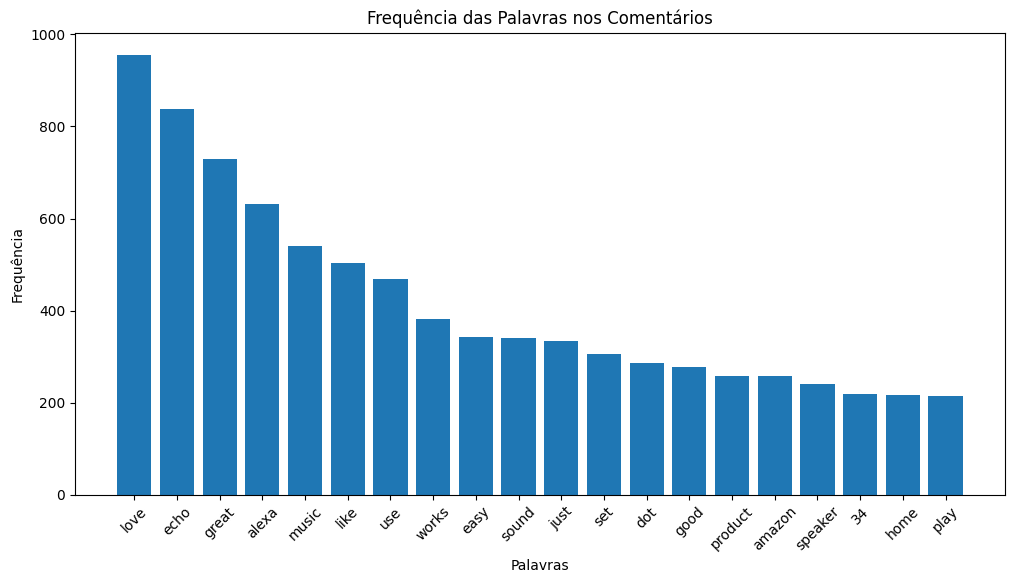

In [83]:
plt.figure(figsize=(12, 6))
plt.bar(word_freq.index[:20], word_freq.values[:20])
plt.xticks(rotation=45)
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.title('Frequência das Palavras nos Comentários')
plt.show()

In [84]:
from textblob import TextBlob

In [85]:
# Análise de sentimentos nos comentários
sentiments = df['verified_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [86]:
# Classificar os sentimentos em positivo, negativo e neutro
positive_sentiments = sentiments[sentiments > 0].count()
negative_sentiments = sentiments[sentiments < 0].count()
neutral_sentiments = sentiments[sentiments == 0].count()

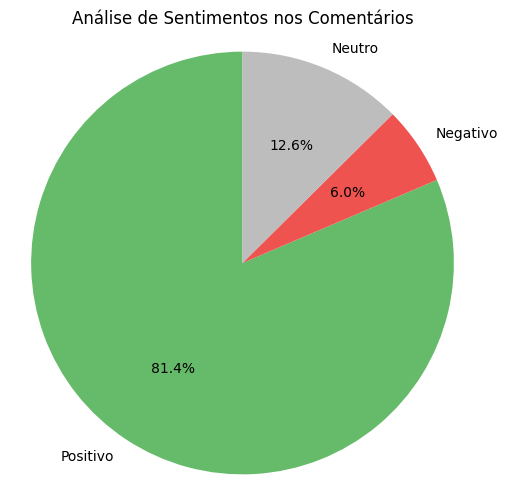

In [87]:
# Gráfico de análise de sentimentos
labels = ['Positivo', 'Negativo', 'Neutro']
sizes = [positive_sentiments, negative_sentiments, neutral_sentiments]
colors = ['#66BB6A', '#EF5350', '#BDBDBD']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Análise de Sentimentos nos Comentários')
plt.show()


Histogramas das colunas numéricas:


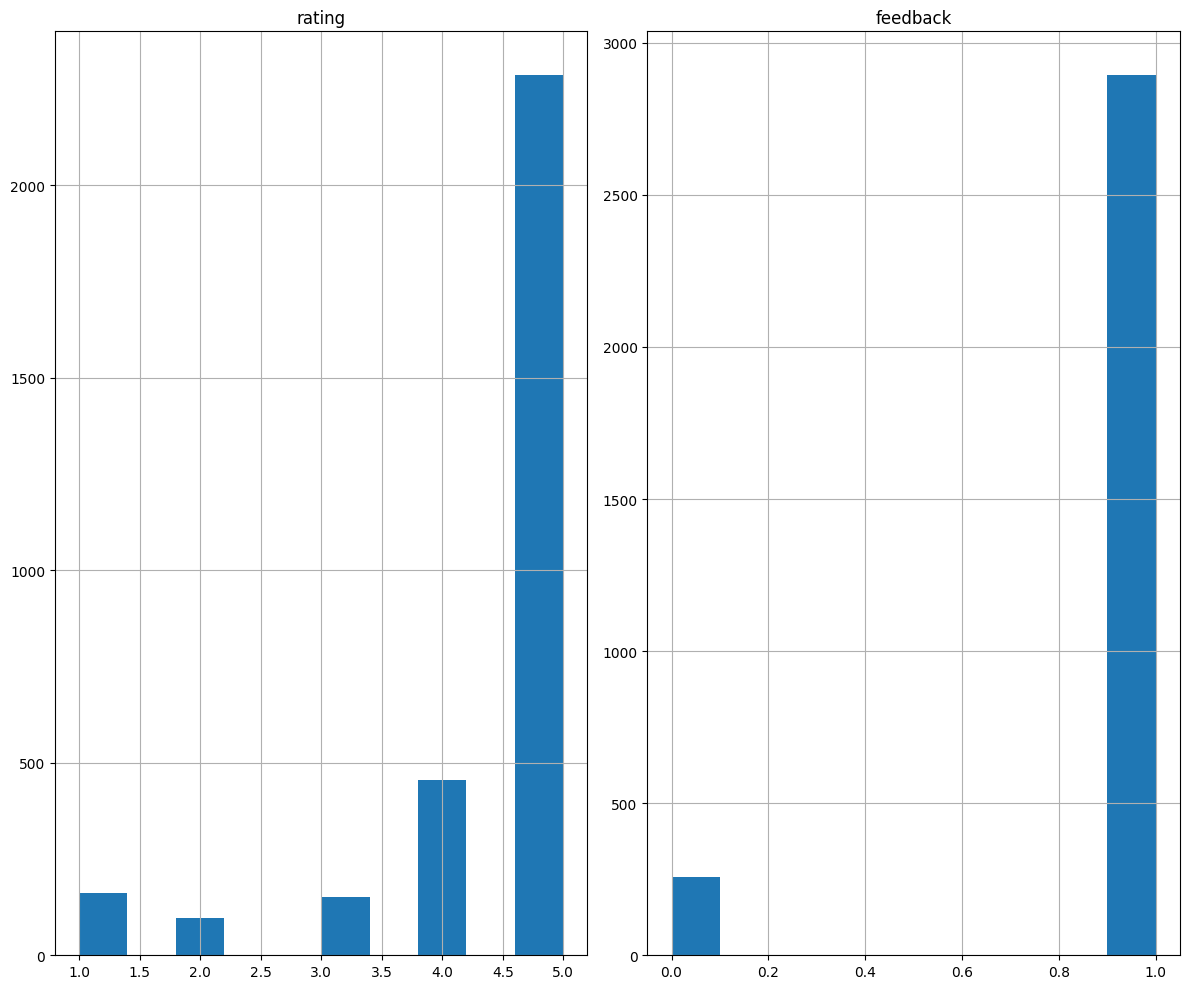

In [8]:
# Histogramas das colunas numéricas
print("\nHistogramas das colunas numéricas:")
df.hist(bins=10, figsize=(12, 10))
plt.tight_layout()
plt.show()

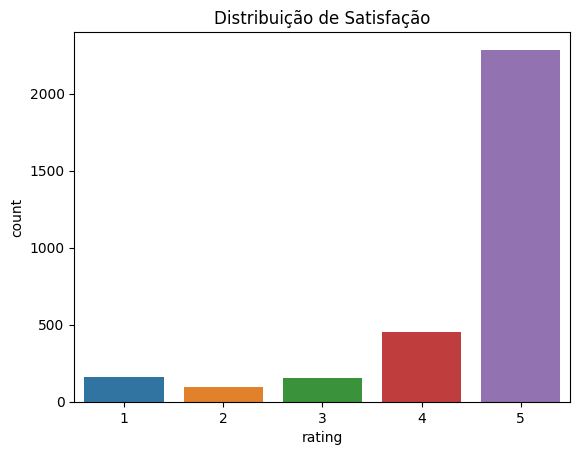

In [10]:
# Verificando a distribuição da variável rating

sns.countplot(x='rating', data=df)
plt.title("Distribuição de Satisfação")
plt.show()

Verificamos que as pessoas mais satisfeitas são as que mais deixam avaliações

# Tratamento de texto

Nessa seção iremos tratar o texto para que os algoritmos consigam ser gerados

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

##### Download dos recursos necessários do NLTK

In [12]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
stop_words = set(stopwords.words('english'))


In [14]:
# Stemming das palavras para reduzir ao radical
stemmer = SnowballStemmer('english')


In [15]:
def preprocess_text(text):
    # Remover pontuações e caracteres especiais
    text = ''.join([c for c in text if c.isalpha() or c.isspace()])
    # Converter para letras minúsculas
    text = text.lower()
    # Tokenização
    words = nltk.word_tokenize(text)
    # Remover stopwords
    words = [word for word in words if word not in stop_words]
    # Aplicar stemming
    words = [stemmer.stem(word) for word in words]
    # Juntar as palavras em uma string novamente
    processed_text = ' '.join(words)
    return processed_text


In [16]:
print(df.columns)

Index(['rating', 'verified_reviews', 'feedback'], dtype='object')


In [17]:
df['processed_reviews'] = df['verified_reviews']

In [18]:
# Dividir os dados em atributos (X) e rótulos (y)
X = df['processed_reviews']
y = df['rating']

In [19]:
# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
# Vetorização dos textos
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

##Após o tratamento dos textos, iremos gerar 3 Algoritmos (Random Forest, SVR e Rede Neural) para comparar suas performaces

#Random Forest

In [47]:
#Modelo de regressão de Random Forest
rf_model = RandomForestRegressor(n_estimators=1200, max_depth=400,random_state=42)

In [48]:
# Treinar o modelo
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=400, n_estimators=1200, random_state=42)

In [49]:
rf_y_pred = rf_model.predict(X_test)

In [50]:
rf_mse = mean_squared_error(y_test, rf_y_pred)
print('Random Forest MSE:', rf_mse)

Random Forest MSE: 0.5960234028911248


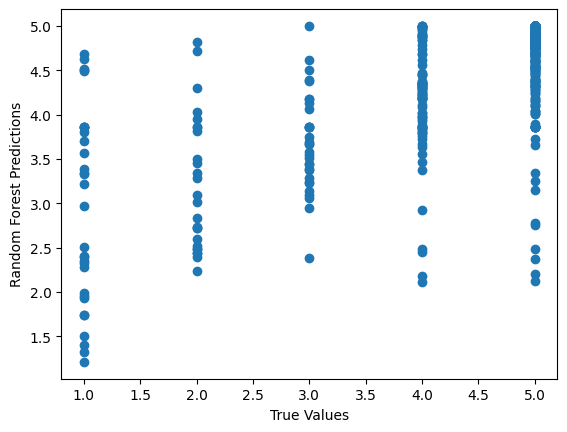

In [27]:
# Plotar os resultados do Random Forest
plt.scatter(y_test, rf_y_pred)
plt.xlabel('True Values')
plt.ylabel('Random Forest Predictions')
plt.show()

#SVR

In [28]:
from sklearn.svm import SVR

In [29]:
# Modelo de regressão do Support Vector Regression
svr_model = SVR(kernel='rbf')

In [30]:
svr_model.fit(X_train, y_train)

SVR()

In [31]:
svr_y_pred = svr_model.predict(X_test)

In [32]:
svr_mse = mean_squared_error(y_test, svr_y_pred)
print('SVR MSE:', svr_mse)

SVR MSE: 0.9103582220446523


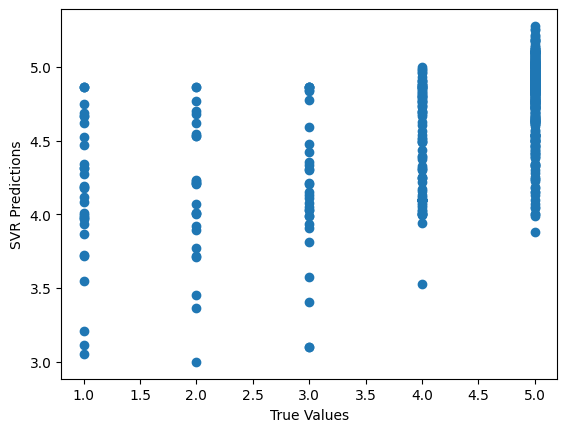

In [33]:
# Plotar os resultados do SVR
plt.scatter(y_test, svr_y_pred)
plt.xlabel('True Values')
plt.ylabel('SVR Predictions')
plt.show()

#Rede Neural

In [34]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [35]:
nn_model = Sequential()
nn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='linear'))

In [36]:
optimizer = Adam(learning_rate=0.001)
nn_model.compile(loss='mean_squared_error', optimizer=optimizer)

In [37]:
# Definir Early Stopping para interromper o treinamento se a perda não melhorar
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

In [38]:
# Treinar o modelo de Rede Neural
nn_model.fit(X_train.toarray(), y_train, epochs=50, batch_size=32, verbose=0)

In [39]:
nn_y_pred = nn_model.predict(X_test.toarray()).flatten()

20/20 [==============================] - 0s 4ms/step


In [45]:
# Calcular o erro médio quadrático (MSE) do SVR
nn_mse = mean_squared_error(y_test, nn_y_pred)
print('NN MSE:', nn_mse)

NN MSE: 0.4964923295950015


#Avaliação dos Modelos

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
import numpy as np

In [42]:
# Calcular as métricas Random Forest
r2 = r2_score(y_test, rf_y_pred)
mae = mean_absolute_error(y_test, rf_y_pred)
rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
medae = median_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)


# Exibir as métricas
print('R²:', r2)
print('MAE:', mae)
print('RMSE:', rmse)
print('Median Absolute Error:', medae)
print('Random Forest MSE:', rf_mse)

R²: 0.5062095964110894
MAE: 0.42836050558870403
RMSE: 0.770934507020948
Median Absolute Error: 0.16049999999999986
Random Forest MSE: 0.5943400141156321


In [43]:
# Calcular as métricas SVR
r2 = r2_score(y_test, svr_y_pred)
mae = mean_absolute_error(y_test, svr_y_pred)
rmse = np.sqrt(mean_squared_error(y_test, svr_y_pred))
medae = median_absolute_error(y_test, svr_y_pred)
svr_mse = mean_squared_error(y_test, svr_y_pred)


# Exibir as métricas
print('R²:', r2)
print('MAE:', mae)
print('RMSE:', rmse)
print('Median Absolute Error:', medae)
print('SVR MSE:', svr_mse)

R²: 0.2436549059500911
MAE: 0.5145337812904336
RMSE: 0.954126942311479
Median Absolute Error: 0.14007315650733876
SVR MSE: 0.9103582220446523


In [46]:
# Avaliar o desempenho do modelo Rede Neural
nn_r2 = r2_score(y_test, nn_y_pred)
nn_mae = mean_absolute_error(y_test, nn_y_pred)
nn_rmse = mean_squared_error(y_test, nn_y_pred, squared=False)
nn_median_ae = median_absolute_error(y_test, nn_y_pred)
nn_mse = mean_squared_error(y_test, nn_y_pred)


# Exibir as métricas
print('R²:', r2)
print('MAE:', mae)
print('RMSE:', rmse)
print('Median Absolute Error:', medae)
print('NN MSE:', nn_mse)

R²: 0.2436549059500911
MAE: 0.5145337812904336
RMSE: 0.954126942311479
Median Absolute Error: 0.14007315650733876
NN MSE: 0.4964923295950015


Entre os 3 modelos, o Random Forest apresentou um desempenho melhor após o ajuste dos hiperparâmetros, com um aumento no coeficiente de determinação (R²) e uma redução no MAE, RMSE e Median Absolute Error em comparação aos outros.


### Referências Bibliográficas:

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

https://www.tensorflow.org/guide/keras/sequential_model?hl=pt-br

https://www.nltk.org/
